In [1]:
import cv2 as cv
import numpy as np
import os

In [2]:
classes_req = {'Parasitized':0, 'Uninfected':1}

In [3]:
path = 'E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/datasets/Malaria Cell Dataset/cell_images/cell_images/'

In [4]:
images = []
labels = []

def load_data(path):
    for folders in os.listdir(path):
        labels_act = folders
        for files in os.listdir(path + folders + '/'):
            image = cv.imread(path + folders + '/' + files)
            if image is None:
                continue
            image = cv.resize(image, (100, 100))
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

            image = image.astype('float32')/255.0
            label = labels_act
            label = classes_req[label]
            
            images.append(image)
            labels.append(label)
            
    images_r = np.array(images)
    labels_r = np.array(labels)
    
    return images_r, labels_r

In [5]:
images, labels = load_data(path)

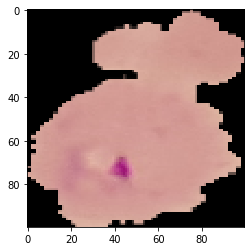

In [6]:
import matplotlib.pyplot as plt

plt.imshow(images[1], cmap='gray')

In [12]:
# images = images.reshape((images.shape[0], 100, 100, 1))
images.shape

(27558, 100, 100, 3)

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

In [15]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(22046, 100, 100, 3) (5512, 100, 100, 3) (22046, 2) (5512, 2)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor = ImageDataGenerator(rotation_range=20, zoom_range=0.1, width_shift_range=0.15, height_shift_range=0.15, shear_range=0.1, validation_split=0.1)

train_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='training')
val_batches = augmentor.flow(X_train, Y_train_req, subset='validation')

In [17]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization, Input, MaxPooling2D
from tensorflow.keras.models import Sequential

In [39]:
model = Sequential()
model.add(Input((100, 100, 3)))

model.add(Conv2D(16, (5,5), activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization(axis=3))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)       

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
steps_per_epoch = X_train.shape[0]/16

history = model.fit_generator(train_batches, epochs=15, steps_per_epoch=steps_per_epoch, validation_data=val_batches)

Epoch 1/15
1378/1377 [==============================] - 245s 178ms/step - loss: 0.2886 - accuracy: 0.8892 - val_loss: 0.2388 - val_accuracy: 0.9342
Epoch 2/15
1378/1377 [==============================] - 267s 194ms/step - loss: 0.2133 - accuracy: 0.9302 - val_loss: 0.1840 - val_accuracy: 0.9406
Epoch 3/15
1378/1377 [==============================] - 279s 203ms/step - loss: 0.1871 - accuracy: 0.9380 - val_loss: 0.1927 - val_accuracy: 0.9456
Epoch 4/15
1378/1377 [==============================] - 275s 200ms/step - loss: 0.1727 - accuracy: 0.9422 - val_loss: 0.1777 - val_accuracy: 0.9442
Epoch 5/15
1378/1377 [==============================] - 279s 202ms/step - loss: 0.1698 - accuracy: 0.9446 - val_loss: 0.1753 - val_accuracy: 0.9460
Epoch 6/15
1378/1377 [==============================] - 297s 216ms/step - loss: 0.1582 - accuracy: 0.9463 - val_loss: 0.1646 - val_accuracy: 0.9465
Epoch 7/15
1378/1377 [==============================] - 282s 205ms/step - loss: 0.1561 - accuracy: 0.9473 - val_

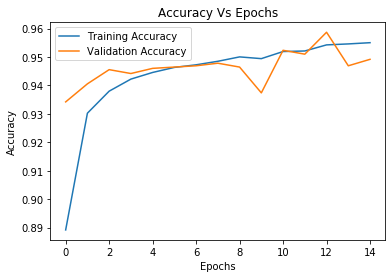

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

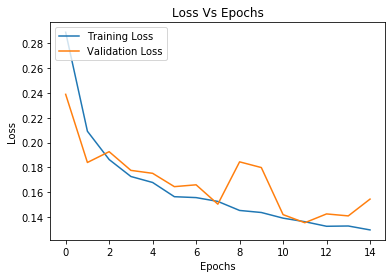

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [45]:
model.evaluate(X_test, Y_test_req, batch_size=32)

5512/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.11809114428948075, 0.9571843]

0


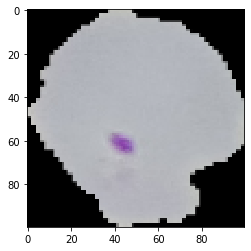

In [46]:
prediction_1 = model.predict_classes(X_test[5511].reshape((1,100,100,3)))
print(prediction_1[0])
plt.imshow(X_test[5511].reshape((100, 100, 3)))

1


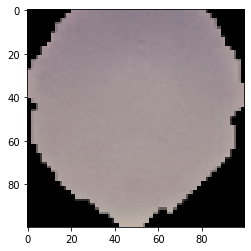

In [47]:
prediction_2 = model.predict_classes(X_test[1001].reshape((1, 100,100,3)))
print(prediction_2[0])
plt.imshow(X_test[1001].reshape((100,100, 3)), cmap='gray')

In [48]:
predictions = model.predict_classes(X_test)

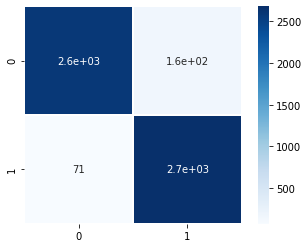

[[2596  165]
 [  71 2680]]


In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)

heatmap = sns.heatmap(cm, annot=True, square=True, linewidth=1, cmap='Blues')
plt.show(heatmap)

print(cm)

In [50]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2761
           1       0.94      0.97      0.96      2751

    accuracy                           0.96      5512
   macro avg       0.96      0.96      0.96      5512
weighted avg       0.96      0.96      0.96      5512



In [51]:
model.save('E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/Saved Models/Malaria Parasitic Cell/Malaria Parasitic Cell.h5')